## Supervised models
This notebook is intended for giving an introduction the ML supervised models that can be used for Covid detection.

For this notebook to find the new modules created for this project, we need to set its path to be in the root directory.

In [1]:
# Auto reload modules
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

<img src="../images/Supervised_Models.png" width="800"/>

## Loading packages and dependencies

In [3]:
from src.preprocessing.image_augmentor import generate_augmented_images
from src.models.build_model import train_advanced_supervised_model, evaluate_model
from src.visualization.visualizer import show_grad_cam_cnn

# Path to the raw data and preprocessed data
raw_data_dir = '../data/raw/dataset/masked_images'
IMG_SIZE = 256  # Resize images to IMG_SIZExIMG_SIZE pixels
batch_size = 32

## Extracting features from images

In [4]:
train_data, val_data, class_weight_dict = generate_augmented_images(raw_data_dir, (IMG_SIZE, IMG_SIZE), batch_size)

Found 16933 images belonging to 4 classes.
Found 4232 images belonging to 4 classes.
Computed Class Weights:{0: 1.4632734185966125, 1: 0.8800935550935551, 2: 0.5191623742948246, 3: 3.9342472118959106} labels: {'COVID': 0, 'Lung_Opacity': 1, 'NORMAL': 2, 'Viral Pneumonia': 3}


## Training and evaluating models

### Convolutional Neural Networks (CNN)

✅ Strengths:
* Highly accurate for image tasks.
* Learns complex patterns automatically.
* Works well with large image datasets.

❌ Weaknesses:
* Computationally expensive (needs GPUs).
* Requires large labeled datasets.
* Not easily interpretable.

In [5]:
# Train the model
cnn_model, cnn_history = train_advanced_supervised_model(train_data, val_data, IMG_SIZE, 50, 4, class_weight_dict, model_type='CNN', classification_type='categorical')

2025-04-06 19:43:26.360346: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2025-04-06 19:43:26.360377: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 128.00 GB
2025-04-06 19:43:26.360380: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 48.00 GB
2025-04-06 19:43:26.360396: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-06 19:43:26.360408: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 18,524,852 (70.67 MB)

 Trainable params: 18,522,868 (70.66 MB)

 Non-trainable params: 1,984 (7.75 KB)

Epoch 1/50


/Users/rehabaam/codes/python/datascientest/project/ds_covid19_project/.ds_covid19/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-04-06 19:43:27.560028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


530/530 ━━━━━━━━━━━━━━━━━━━━ 95s 173ms/step - accuracy: 0.2851 - loss: 108.8474 - val_accuracy: 0.3767 - val_loss: 177.6542 - learning_rate: 1.0000e-04
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 81s 153ms/step - accuracy: 0.3789 - loss: 498.9378 - val_accuracy: 0.6231 - val_loss: 345.0800 - learning_rate: 1.0000e-04
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 81s 153ms/step - accuracy: 0.5061 - loss: 685.0265 - val_accuracy: 0.6056 - val_loss: 747.4417 - learning_rate: 1.0000e-04
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.4905 - loss: 1003.5620
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
530/530 ━━━━━━━━━━━━━━━━━━━━ 92s 173ms/step - accuracy: 0.4905 - loss: 1003.5445 - val_accuracy: 0.6007 - val_loss: 414.2990 - learning_rate: 1.0000e-04
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 106s 199ms/step - accuracy: 0.4700 - loss: 1026.5112 - val_accuracy: 0.6871 - val_loss: 473.9067 - learning_rate: 5.0000e-05
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━

In [6]:
cnn_train_loss, cnn_train_acc = cnn_history.history['loss'][-1], cnn_history.history['accuracy'][-1]
print(f"Train Accuracy: {cnn_train_acc:.4f}, Train Loss: {cnn_train_loss:.4f}")

cnn_test_loss, cnn_test_acc = evaluate_model("Multi-label classification [Normal, COVID, Viral Pneumonia, Lung_Opacity] for masked images", cnn_model, val_data, _, model_type="CNN", classification_type="multiclass")
print(f"Test Accuracy: {cnn_test_acc:.4f}, Test Loss: {cnn_test_loss:.4f}")

Train Accuracy: 0.4941, Train Loss: 1165.0496
133/133 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.3875 - loss: 172.9227
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


Registered model 'tensorflow-CNN-multiclass' already exists. Creating a new version of this model...
2025/04/06 19:52:51 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tensorflow-CNN-multiclass, version 2


🏃 View run CNN-multiclass at: http://localhost:8080/#/experiments/433589142463086054/runs/68b669edb5db453898dcca57a1ea8fae
🧪 View experiment at: http://localhost:8080/#/experiments/433589142463086054
Test Accuracy: 0.3767, Test Loss: 177.6542


Created version '2' of model 'tensorflow-CNN-multiclass'.


#### Model interpretation with GradCam

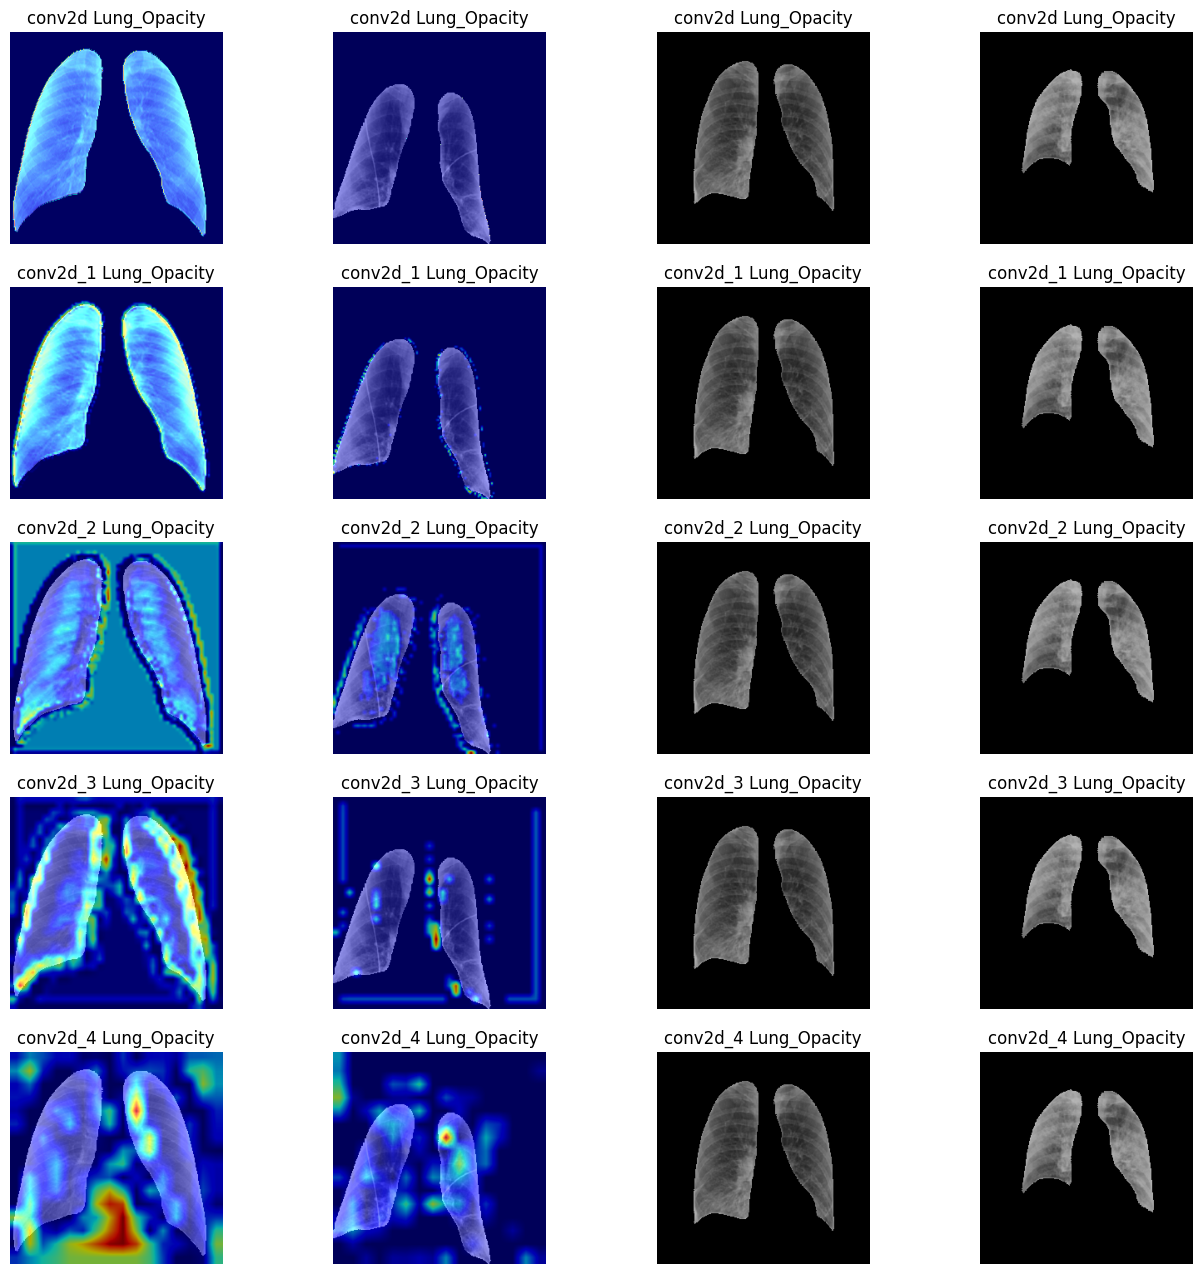

In [7]:
class_names = list(val_data.class_indices.keys())

images, labels = next(val_data)
show_grad_cam_cnn(images[:4], cnn_model, class_names)

### Transfer learning

✅ Strengths
* Transfer learning reduces training time while maintaining high accuracy.
* Fine-tuning improves performance when sufficient data is available.
* Combining deep features with statistical features can enhance results.

In [8]:
trl_model, trl_history = train_advanced_supervised_model(train_data, val_data, IMG_SIZE, 50, 4, class_weight_dict, model_type="Transfer Learning", classification_type='categorical')

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 256, 256,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 256, 256,  │          7 │ rescaling_1[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 256, 256,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 257, 257,  │          0 │ rescaling_2[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 128, 128,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 128, 128,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 128, 128,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 128, 128,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 128, 128,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 128, 128,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 128, 128,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 128, 128,  │        512 │ block1a_se_excit

 Total params: 4,214,055 (16.08 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 55s 93ms/step - accuracy: 0.5403 - loss: 1.0151 - val_accuracy: 0.6827 - val_loss: 0.7818 - learning_rate: 1.0000e-04
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 43s 81ms/step - accuracy: 0.6957 - loss: 0.6410 - val_accuracy: 0.7259 - val_loss: 0.6485 - learning_rate: 1.0000e-04
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.7363 - loss: 0.5715 - val_accuracy: 0.7616 - val_loss: 0.5665 - learning_rate: 1.0000e-04
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 40s 76ms/step - accuracy: 0.7496 - loss: 0.5491 - val_accuracy: 0.7304 - val_loss: 0.6460 - learning_rate: 1.0000e-04
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 41s 77ms/step - accuracy: 0.7531 - loss: 0.5270 - val_accuracy: 0.7732 - val_loss: 0.5467 - learning_rate: 1.0000e-04
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 41s 77ms/step - accuracy: 0.7706 - loss: 0.4997 - val_accuracy: 0.7911 - val_loss: 0.5169 - learning_rate: 1.0000e-04
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/ste

In [9]:
trl_train_loss, trl_train_acc = trl_history.history['loss'][-1], trl_history.history['accuracy'][-1]
print(f"Train Accuracy: {trl_train_acc:.4f}, Train Loss: {trl_train_loss:.4f}")

trl_test_loss, trl_test_acc = evaluate_model("Multi-label classification [Normal, COVID, Viral Pneumonia, Lung_Opacity] for masked images", trl_model, val_data, _, model_type="Transfer Learning", classification_type="multiclass")
print(f"Test Accuracy: {trl_test_acc:.4f}, Test Loss: {trl_test_loss:.4f}")

Train Accuracy: 0.7929, Train Loss: 0.4515
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.8327 - loss: 0.4381
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Registered model 'tensorflow-Transfer Learning-multiclass' already exists. Creating a new version of this model...
2025/04/06 20:03:50 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tensorflow-Transfer Learning-multiclass, version 2


🏃 View run Transfer Learning-multiclass at: http://localhost:8080/#/experiments/433589142463086054/runs/98cd5bdd32174ba6a45929b6a6902e63
🧪 View experiment at: http://localhost:8080/#/experiments/433589142463086054
Test Accuracy: 0.8223, Test Loss: 0.4499


Created version '2' of model 'tensorflow-Transfer Learning-multiclass'.
